# Riddler for April 5th 2019

In this notebook, I'll be exploring the FiveThirtyEight Riddler from [April 5th 2019](https://fivethirtyeight.com/features/does-your-gift-card-still-have-free-drinks-on-it/). The setup for this problem is that you're given a couple of gift cards which are loaded with free drinks. You're lazy and you'll randomly use one or the other each time you go to the coffee shop. Eventually you run out of drinks on one of the card. The question is: how likely is it that you're other card has any drinks on it, and on average how many drinks will you have left over?

I'll solve the problem analytically and check my work by simulating the process. I'll also slightly generalize the questions and expand the analysis to three cards.

## Table of Contents

1.  [Prompt](#prompt)  
2.  [Analytical solution (2 cards)](#2cardanalyze)  
2.1 [Probability of stopping with $l$ drinks left](#2cardProb)  
2.2 [Average number of drinks remaining](#2cardMean)  
2.3 [Probability that any drinks are left](#2cardDrinksLeft)  
3. [Simulation Solution (2 cards)](#2cardSim)
4. [Extra Credit](#extraCredit)  
4.1 [Distribution of Drinks Remaining vs Drinks Loaded (2 cards)](#drinksAsFunctionOfLoaded)  
4.2 [Mean drinks remaining and probability that drinks are left vs # drinks loaded (2 cards)](#meanAsFunctionOfLoaded)  
4.3 [Analysis For Three Cards](#3cardAnalysis)  
4.4 [Simulation Solution for 3 Cards](#3cardSim)

## 1. Prompt <a id="prompt"></a>

Here's the formal prompt statement which I copied from [here](https://fivethirtyeight.com/features/does-your-gift-card-still-have-free-drinks-on-it/).

*Lucky you! You’ve won two gift cards, each loaded with 50 free 
drinks from your favorite coffee shop, Riddler Caffei-Nation. 
The cards look identical, and because you’re not one for 
record-keeping, you randomly pick one of the cards to pay with 
each time you get a drink. One day, the clerk tells you that 
he can’t accept the card you presented to him because it doesn’t 
have any drink credits left on it.*

*What is the probability that the other card still has free 
drinks on it? How many free drinks can you expect are still 
available?*

## 2. Analytical Solution <a id="2cardanalyze"></a>

### 2.1 Probability of stopping with $l$ drinks left <a id="2cardProb"></a>
First, we'll consider the probability that we stop our process with exactly $l$ drinks left on the non-empty card. We'll denote this by $P(\text{Stop with $l$ drinks left})$. To be ever-so-slightly more general, we'll allow both cards to have $n_{\text{drinks}}$ drinks on them.

For the sake of discussion, let's refer to our gift cards as A and B. Since both cards are identical, whenever we randomly pull a card out of our wallet to pay it's the same as flipping a fair coin to decide whether to use A or B. Without loss of generality, we will use card A on heads and card B on tails.

Let's analyze the situation where we have reached the prompt's stopping criteria after pulling out Card A (ie, we just went in the coffee shop, randomly choose card A and found out that it is empty / haven't run out of drinks on any earlier trips), and that we know Card B has $l$ drinks left on int. The case where A and B are interchanged has an identical analysis.

Since we've just been alerted that A is empty, we have used it exactly $n_{\text{drinks}} + 1 $ times. Since $l$ drinks remain on B, we have used it $n_{\text{drinks}} - l$ times. In total, we've been to the shop  $n_{\text{trips}} = (n_{\text{drinks}} + 1) + (n_{\text{drinks}} - l) = 2 \cdot n_{\text{drinks}} - l + 1$ times. This is equivalent to having flipped a fair coin $2\cdot n_{\text{drinks}} - l + 1$ times where:
 1. we observe $n_{\text{drinks}} + 1$ heads
 2. we observe $n_{\text{drinks}} - l$ tails
 3. the last flip came up heads (since we used A last)

So:
$$ 
\begin{eqnarray}
  P(\text{Stop on $A$ with $l$ drinks left on $B$}) 
  &=& P(\text{$n_{\text{drinks}} + 1$ heads, $n_{\text{drinks}} - l$ tails, and last flip is heads}) \\
  &=& P(\text{$n_{\text{drinks}}$ heads, $n_{\text{drinks}} - l$ tails}) \cdot P(\text{heads}) \\
  &=& \text{Binomial PMF}(2\cdot n_{\text{drinks}} - l,~n_{\text{drinks}},~p = 0.5) \cdot 0.5
\end{eqnarray}
$$
 
By a symmetric argument, we find that $P(\text{Stop on $B$ with $l$ drinks left on $A$})$ has the same value. Since we either stop on card A or on card B it follows that:

$$ P(\text{Stop with $l$ drinks left}) = \text{Binomial PMF}(2\cdot n_{\text{drinks}} - l,~n_{\text{drinks}},~p=0.5)$$

Here, I'm using the notation for the Binomial point mass function from [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html).

### 2.2 Average number of drinks remaining <a id="2cardMean"></a>
The average number of drinks remaining is given by the following expression:

$$ 
\begin{eqnarray}
E[n_{\text{drinks left}}] 
&=& \sum_{l = 0}^{n_{\text{drinks}}} l \cdot P(\text{Stop with $l$ drinks left}) \\
&=& \sum_{l = 0}^{n_{\text{drinks}}} l \cdot \text{Binomial PMF}(2\cdot n_{\text{drinks}} - l,~n_{\text{drinks}},~p=0.5) \\
\end{eqnarray}
$$

In the prompt, we have $n_{\text{drinks}} = 50$, so:
$$
\begin{eqnarray}
E[n_{\text{drinks left}}] 
&=& \sum_{l = 0}^{n_{\text{drinks}}} l \cdot \text{Binomial PMF}(100 - l,~50,~p=0.5) \\
&\approx& 7.0385\\ 
\end{eqnarray}
$$

### 2.3 Probability that any drinks are left <a id="2cardDrinksLeft"></a>
The probability that any drinks remain is:

$$ 
\begin{eqnarray}
P(\text{Stop with $l > 0$ drinks left}) &=& 1 - P(\text{Stop with $0$ drinks left}) \\
&=& 1 - \text{Binomial PMF}(2\cdot n_{\text{drinks}},~n_{\text{drinks}},~p=0.5)
\end{eqnarray}
$$

For the prompt, this is:

$$ 
\begin{eqnarray}
P(\text{Stop with $l > 0$ drinks left}) &=& 1 - \text{Binomial PMF}(100,~50,~p=0.5) \\
&\approx& 0.9204
\end{eqnarray}
$$


## 3. Simulation Solution <a id="2cardSim"></a>

Now I'll simulate the process and plot the results of the simulation against the analytical results. My functions will handle a situation that is a bit more general than required by the prompt - so that I can reuse my code to simulate 3 cards below.

In what follows, I'll provide a comparison of the simulated distribution of remaining drinks against the theoretical distribution described above. I'll also use the simulated distribution to estimate the average number of drinks remaining and the probability that our other card actually has some drinks left over.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
import numpy as np
from scipy.stats import binom, multinomial

# simulate the draw-down process for the gift cards return the 
# number of drinks left on each card at the end
def simulate_giftcards(n_drinks_per_card = 50, n_cards = 2):
    drinks_left = np.array([n_drinks_per_card for i in range(n_cards)], dtype='int')

    while True:
        card_used = np.random.randint(0, n_cards)
        if drinks_left[card_used] == 0:
            break
        else:
            drinks_left[card_used] = drinks_left[card_used] - 1

    return drinks_left

# simulate the distribution of total drinks remaining on all giftcards
def simulate_drinks_left_distro(n_runs = 10000, n_drinks_per_card = 50, n_cards = 2):
    n_drinks_left = np.zeros(n_runs, dtype=int)

    for i in range(n_runs):
        n_drinks_left[i] = simulate_giftcards(n_drinks_per_card, n_cards).sum()

    return n_drinks_left

# Analytical distribution for 2 cards
def analytic_prob_2(n_drinks_per_card = 50):
    n_left = np.array(range(0, n_drinks_per_card+1))
    p_left = binom.pmf(n_drinks_per_card, 2 * n_drinks_per_card - n_left, 0.5)
    return p_left

# Plot the result under the prompt's parameters
def plot_riddler_results(n_runs = 10000):
    # This is fixed
    n_cards = 2
    n_drinks_per_card = 50
    
    # Simulate results / print info
    n_drinks_left_sim = simulate_drinks_left_distro(n_runs)
    avg_remaining_sim = np.mean(n_drinks_left_sim)
    prob_nonzero_sim  = np.count_nonzero(n_drinks_left_sim) / n_runs
    print("Simulation results ({0} cards, {1} drinks/card)".format(n_cards, n_drinks_per_card))
    print("----------------------------------------")
    print("Average drinks remaining : ", avg_remaining_sim)
    print("Probability drinks remain: ", prob_nonzero_sim)
    print("")

    # Solve analytically
    n_left = np.array(range(0, n_drinks_per_card+1))
    p_left = analytic_prob_2(n_drinks_per_card)
    avg_remaining_analytic = np.sum(n_left * p_left)
    prob_nonzero_analytic = 1.0 - p_left[0]
    print("Analytical results ({0} cards, {1} drinks/card)".format(n_cards, n_drinks_per_card))
    print("----------------------------------------")
    print("Average drinks remaining : ", avg_remaining_analytic)
    print("Probability drinks remain: ", prob_nonzero_analytic)
    print("") 

    # Plot the figure with comparison
    fig, ax = plt.subplots()
    ax.hist(n_drinks_left_sim, bins=range(0, n_drinks_per_card+1),
            density=True, label="Simulated")
    ax.plot(n_left, p_left, drawstyle="steps-post",
            label = "Analytical")
    ax.set_xlabel("Drinks Remaining")
    ax.set_ylabel("Frequency")
    
    ax.legend()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=1))
    plt.show()

Simulation results (2 cards, 50 drinks/card)
----------------------------------------
Average drinks remaining :  7.0789
Probability drinks remain:  0.9188

Analytical results (2 cards, 50 drinks/card)
----------------------------------------
Average drinks remaining :  7.038512976105146
Probability drinks remain:  0.9204107626128211



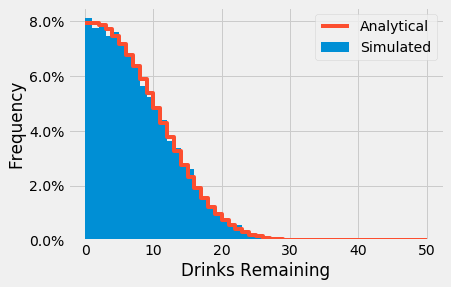

In [2]:
%matplotlib inline
np.random.seed(8675309)
style.use('fivethirtyeight')
plot_riddler_results(10000)

## 4. Extra Credit <a id="extraCredit"></a>

In a lot of the Riddler problems, the prompt has an "Extra Credit" section where some generalizations of the prompt are suggested. No "Extra Credit" was suggested for this problem, but there were some straightforward generalizations of the prompt which sounded fun to think about.

In this section, I'll expand on the analysis / simulations from above, and will do the following:
  1. First, I'll take a look at how the distribution of remaining drinks varies as a function of the number of drinks loaded per card. For the prompt, I only just looked at this distribution for 50 drinks/card, but it might be interesting to check it out for a few other values.
  2. Next, I'll take a look at how the mean number of drinks remaining / probability that any drinks are left varies as a function of the number of drinks loaded per card.
  3. Finally. I'll extend the analysis to 3 cards and repeat the results we saw above. 

### 4.1 Distribution of Drinks Remaining vs Drinks Loaded <a id="drinksAsFunctionOfLoaded"></a>

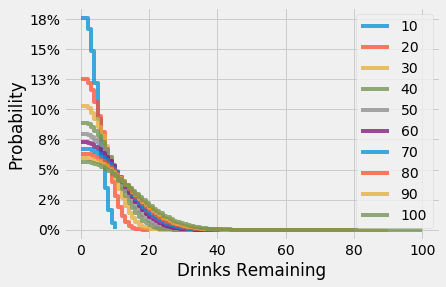

In [3]:
fig, ax = plt.subplots()
for n_drinks_per_card in range(10, 100+1, 10):
    p_left = analytic_prob_2(n_drinks_per_card)
    ax.plot(p_left, drawstyle="steps-post", label=n_drinks_per_card, alpha = 0.75)
ax.legend()
ax.set_xlabel("Drinks Remaining")
ax.set_ylabel("Probability")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
plt.show()

### 4.2 Mean Drinks Remaining and Probability That Drinks are Left vs Drinks Loaded <a id="meanAsFunctionOfLoaded"></a>

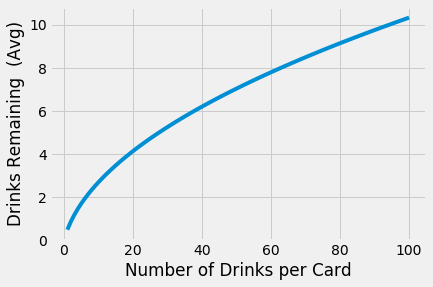

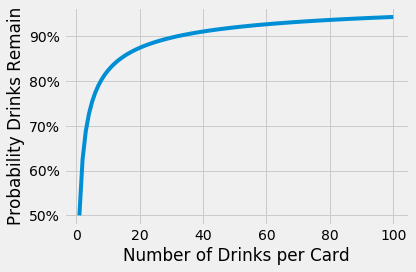

In [4]:
n_max = 100
n_drinks_per_card = np.arange(1,n_max+1)
mean_drinks_left = np.zeros(n_max)
prob_some_left   = np.zeros(n_max)

for i in n_drinks_per_card:
    n_left = np.arange(0, i+1)
    p_left = analytic_prob_2(i)
    mean_drinks_left[i - 1] = np.sum( n_left * p_left )
    prob_some_left[i - 1] = 1.0 - p_left[0]    

fig, ax = plt.subplots()
ax.plot(n_drinks_per_card, mean_drinks_left)
ax.set_ylabel("Drinks Remaining  (Avg)")
ax.set_xlabel("Number of Drinks per Card")

fig, ax = plt.subplots()
ax.plot(n_drinks_per_card, prob_some_left)
ax.set_ylabel("Probability Drinks Remain")
ax.set_xlabel("Number of Drinks per Card")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))

plt.tight_layout()
plt.show()

### 4.3 Analysis For Three Cards <a id="3cardAnalysis"></a>
    
Let's briefly extend the derivation from above to three cards. To start, I'll now label the cards A, B, and C. Then, a straightforward extension of the earlier derivation gives: 
$$ 
\begin{eqnarray}
  P(\text{Stop on $A$ with $l_B$ drinks left on $B$ and $l_C$ on $C$}) 
  = 1/3 \cdot \text{Multinomial PMF} (x &=& (n_{\text{drinks}},~n_{\text{drinks}} - l_B,~n_{\text{drinks}} - l_C),\\
  ~~N &=& 3\cdot n_{\text{drinks}} - l_B - l_C, \\
  ~~p &=& [1/3,1/3,1/3] )
\end{eqnarray}
$$
Here, I've been somewhat lazy concecptually (sorry if you're reading this!) and am also using the notation from [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html).


Then, the probability that we stop with $l$ drinks remaining on any card is obtained as follows:
$$ 
\begin{eqnarray}
  &P&(\text{Stop with $l$ drinks left on other cards}) \\
  &&= \sum_{l_B = 0}^{l} \text{Multinomial PMF} (x = (n_{\text{drinks}},~n_{\text{drinks}} - l_B,~n_{\text{drinks}} - (l - l_B)), ~N = 3\cdot n_{\text{drinks}} - l, ~p = [1/3,1/3,1/3] )
\end{eqnarray}
$$

The mean number of drinks remaining and probability that any drinks are left can be calculated from this as above.

### 4.4 Simulation Solution for Three Cards <a id="3cardSim"></a>

Now that we know what the answer should be, I'll simulate the process and compare the analytical result to the simulation result.

In [5]:
def analytic_prob_3(n_drinks_per_card = 50):
    n_cards = 3    
    n_left = np.array(range(0, 2 * n_drinks_per_card + 1))
    p_left = np.zeros(2 * n_drinks_per_card+1)
    
    for l in range(len(p_left)):
        n   = np.empty(l+1)
        n.fill(3 * n_drinks_per_card - l)
        
        n_A = np.empty(l+1)
        n_A.fill(n_drinks_per_card)
        
        l_B = np.array(range(0, l +1))
        n_B = n_drinks_per_card - l_B
        n_C = n_drinks_per_card - (l - l_B)
        
        tmp = np.array([n, n_A, n_B, n_C]).T
        tmp = tmp[tmp.min(axis=1)>=0, :]
        n = tmp[:, 0]        
        tmp = tmp[:, 1:]
        
        p_left[l] = multinomial.pmf(
                tmp, 
                n = n,  
                p = np.array([1.0/3.0, 1.0/3.0, 1.0/3.0])
        ).sum()
        
    return p_left

def plot_sim_analytic_comp_3(n_runs = 10000, n_drinks_per_card = 50):
    # Simulate results for 3 cards / print info
    n_cards = 3
    n_drinks_left_sim = simulate_drinks_left_distro(n_runs, n_drinks_per_card, n_cards)
    avg_remaining_sim = np.mean(n_drinks_left_sim)
    prob_nonzero_sim  = np.count_nonzero(n_drinks_left_sim) / n_runs
    print("Simulation results ({0} cards, {1} drinks/card)".format(n_cards, n_drinks_per_card))
    print("----------------------------------------")
    print("Average drinks remaining : ", avg_remaining_sim)
    print("Probability drinks remain: ", prob_nonzero_sim)
    print("")

    # Analytical distro for 3 cards
    n_left = np.array(range(0, 2 * n_drinks_per_card+1))
    p_left = analytic_prob_3(n_drinks_per_card)
    avg_remaining_analytic = np.sum(n_left * p_left)
    prob_nonzero_analytic = 1.0 - p_left[0]
    print("Analytical results ({0} cards, {1} drinks/card)".format(n_cards, n_drinks_per_card))     
    print("----------------------------------------")
    print("Average drinks remaining : ", avg_remaining_analytic)
    print("Probability drinks remain: ", prob_nonzero_analytic)
    print("") 
    
    # Plot the figure with comparison
    fig, ax = plt.subplots()
    ax.hist(n_drinks_left_sim, bins=range(0, 2*n_drinks_per_card+1), density=True, label="Simulated")      
    ax.plot(range(0, 2*n_drinks_per_card+1), p_left, drawstyle="steps-post", label = "Analytical")
    ax.set_xlabel("Drinks Remaining")
    ax.set_ylabel("Frequency")
    ax.legend()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))
    
    return ax    

Simulation results (3 cards, 50 drinks/card)
----------------------------------------
Average drinks remaining :  15.8056
Probability drinks remain:  0.9952

Analytical results (3 cards, 50 drinks/card)
----------------------------------------
Average drinks remaining :  15.811392747341372
Probability drinks remain:  0.9945111598192252



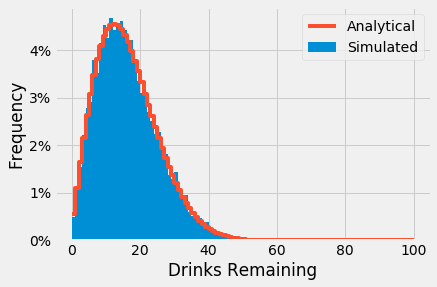

In [6]:
np.random.seed(1984)
plot_sim_analytic_comp_3(n_runs = 10000, n_drinks_per_card = 50)
plt.show()

Good, there's agreement between the prediction and our simulation - so it's not likely that our answer is wrong (:

Also (unsurprisingly) you can see that you're much more likely to still have drinks remaining at the end of the process if you have three cards than if you only had two cards. Likewise, you can expect to have a bit more than twice as many drinks left over.